In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv("../../datasets/1976-2018-house2.csv", encoding="latin1")

In [12]:
# First 5 rows
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362,False,20200424


In [9]:
# Statistical metrics
data.describe()

,year,state_fips,state_cen,state_ic,district,candidatevotes,totalvotes,version
count,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.000000,29636.0
mean,1997.724322,28.732015,50.862397,37.025375,9.892462,64249.576798,206191.268559,20200424.0
std,12.512426,15.213433,26.326139,21.812798,9.991146,61442.185888,70158.576241,0.0
min,1976.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,20200424.0
25%,1988.000000,17.000000,23.000000,14.000000,3.000000,4277.500000,158643.000000,20200424.0
50%,1998.000000,31.000000,51.000000,36.000000,6.000000,55736.000000,201162.000000,20200424.0
75%,2008.000000,40.000000,74.000000,52.000000,13.000000,108338.750000,251238.000000,20200424.0
max,2018.000000,56.000000,95.000000,82.000000,53.000000,329800.000000,507831.000000,20200424.0


In [11]:
# What are the columns?
data.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'runoff', 'special', 'candidate',
       'party', 'writein', 'mode', 'candidatevotes', 'totalvotes',
       'unofficial', 'version'],
      dtype='object')

# Understanding the Data: Columns

year: year in which election was held

state: state name

description: state abbreviation

state_fips: numeric state code

state_cen: US census state code

state_ic: ICPSR state code

office: U.S. House (constant)

district: District number. At-large districts are coded as 0

stage: electoral stage ("gen" = general, "pri" = primary)

special: special election boolean (True = special election, False = regular election

candidate: name of candidate

party: party of candidate 

writein: boolean write in candidate (true = write-in, false = not write-in)

mode: mode of voting

candidatevotes: # of votes received by this candidate for this party

totalvates: total number of votes cast for this election

unofficial: boolean True/False (true = unofficial result)

version: date when this dataset was finalized

In [14]:
# Plot some distributions for 2018
data2018 = data[data["year"] == 2018]
data2018.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
28251,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Robert Kennedy Jr.,democrat,False,total,89226,242617,False,20200424
28252,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,Bradley Byrne,republican,False,total,153228,242617,False,20200424
28253,2018,Alabama,AL,1,63,41,US House,1,gen,NaN,False,NaN,NaN,True,total,163,242617,False,20200424
28254,2018,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Martha Roby,republican,False,total,138879,226230,False,20200424
28255,2018,Alabama,AL,1,63,41,US House,2,gen,NaN,False,Tabitha Isner,democrat,False,total,86931,226230,False,20200424


In [171]:
data2018State = data2018.groupby(["state", "party"]).sum()
data2018State

year  state_fips  state_cen  state_ic  district  \
state     party                                                            
Alabama   democrat      14126           7        441       287        28   
          republican    12108           6        378       246        21   
Alaska    democrat       2018           2         94        81         0   
          republican     2018           2         94        81         0   
Arizona   democrat      18162          36        774       549        45   
...                       ...         ...        ...       ...       ...   
Wisconsin republican    14126         385        245       175        34   
Wyoming   constitution   2018          56         83        68         0   
          democrat       2018          56         83        68         0   
          libertarian    2018          56         83        68         0   
          republican     2018          56         83        68         0   

                        special  writein  candidatevotes  totalvotes  \
state     party                                                        
Alabama   democrat          0.0      0.0          678687     1659895   
          republican        0.0      0.0          975737     1470732   
Alaska    democrat          0.0      0.0          131199      282166   
          republican        0.0      0.0          149779      282166   
Arizona   democrat          0.0      0.0         1179193     2341270   
...                         ...      ...             ...         ...   
Wisconsin republican        0.0      0.0         1172964     2254360   
Wyoming   constitution      0.0      0.0            6070      201245   
          democrat          0.0      0.0           59903      201245   
          libertarian       0.0      0.0            6918      201245   
          republican        0.0      0.0          127963      201245   

                        unofficial    version  
state     party                                
Alabama   democrat             0.0  141402968  
          republican           0.0  121202544  
Alaska    democrat             0.0   20200424  
          republican           0.0   20200424  
Arizona   democrat             0.0  181803816  
...                            ...        ...  
Wisconsin republican           0.0  141402968  
Wyoming   constitution         0.0   20200424  
          democrat             0.0   20200424  
          libertarian          0.0   20200424  
          republican           0.0   20200424  

[213 rows x 11 columns]

In [172]:
# Aggregate state totals
data2018Dem = data2018[data2018["party"] == "democrat"].groupby(by=["state"]).sum()
data2018Rep = data2018[data2018["party"] == "republican"].groupby(by=["state"]).sum()

In [149]:
demCounts = data2018Dem["totalvotes"]
repCounts = data2018Rep["totalvotes"]
demIndices = data2018Dem.index
stateIndices = data2018Rep.index

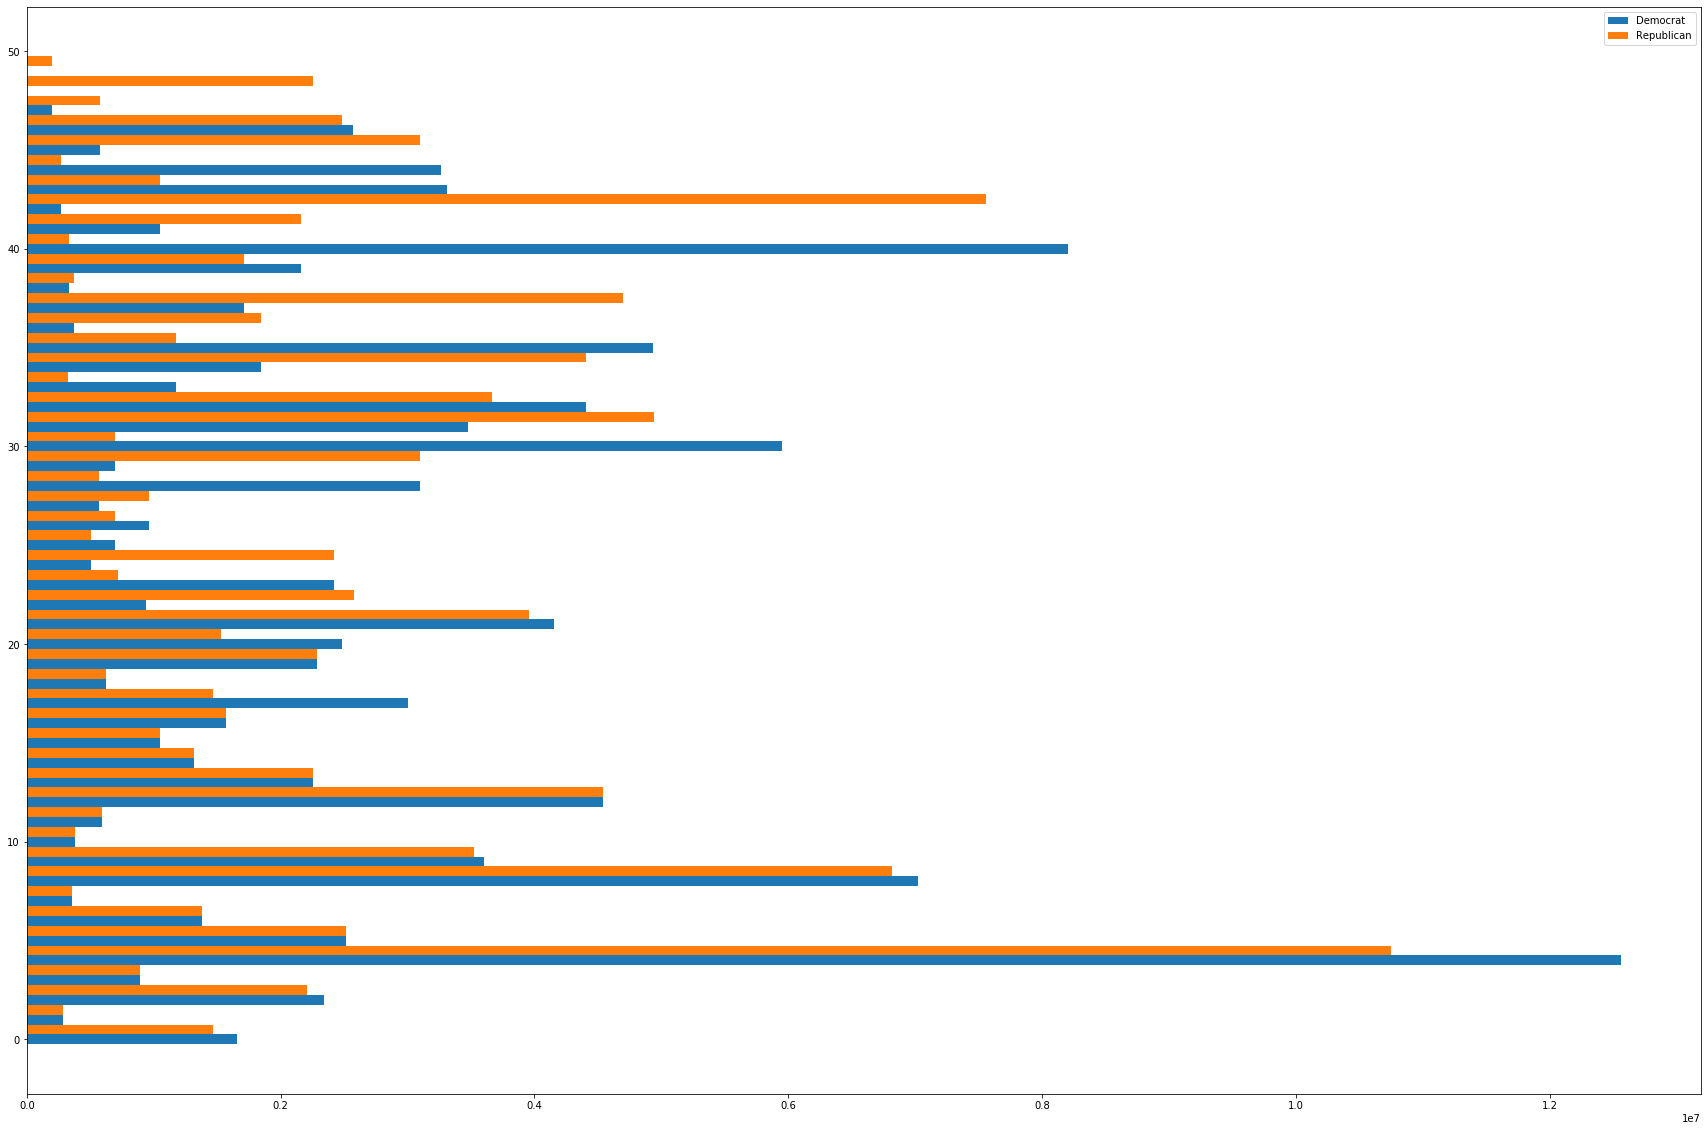

In [147]:
fig = plt.gcf()
fig.set_size_inches(30, 20)
p1 = plt.barh(np.arange(48), demCounts, height=0.5)
p2 = plt.barh(np.arange(50) + 0.5, repCounts, height=0.5)
plt.legend((p1[0], p2[0]), ("Democrat", "Republican"))